##### Import dependencies

In [451]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Exercise 1: Linear regression

Prices per square for old apartment houses in Turku (Source: Tilastokeskus)

In [452]:
price = [1699, 1715, 1765, 1782, 1792, 1824, 1845, 1914, 1952];
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018];

Gradient descent

In [453]:
def gradientDescent(cost, gradient, initial, alpha, iters):
   position = initial;
   cost_history = [];
   for i in range(iters): 
      position = position - alpha*gradient(position);
      if(((i + 1) % 10) == 0):  
         print(f"iteration = {i+1} , cost = {cost(position)}, position = {position}");
         cost_history.append(cost(position));    
   return [position, cost_history];

In [454]:
x_org = np.array(year);
y_org = np.array(price);
# feature scaling
x = (x_org - np.min(x_org))/(np.max(x_org)-np.min(x_org));
y = (y_org - np.min(y_org))/(np.max(y_org)-np.min(y_org));

initial = np.array([0, 0]);

In [455]:
def cost(position):
    alpha = position[0];
    beta = position[1];
    m = y.shape[0];
    return 1/(2*m)*np.sum(np.square(alpha*x+beta-y));

print("cost: " + str(cost(initial)));

cost: 0.1452269732902144


In [456]:
def gradient(position):
    alpha = position[0];
    beta = position[1];
    m = y.shape[0];
    delta_alpha = (1/m)*np.sum(np.multiply(alpha*x+beta-y,x));
    delta_beta = (1/m)*np.sum(alpha*x+beta-y);
    return np.array([delta_alpha, delta_beta]);

Test the gradient. Difference with approximation and calculated value should be close to zero.

In [457]:
e = 0.0001
approx = [(cost(initial+[e, 0])-cost(initial))/e, (cost(initial+[0, e])-cost(initial))/e]
value = gradient(initial)
print(f"approx = {approx}, value = {value}, diff = {(approx-value)/value}")

approx = [-0.3183288002309159, -0.43780682916133573], value = [-0.31834651 -0.43785683], diff = [-5.56259689e-05 -1.14192577e-04]


In [458]:
[[alpha, beta], cost_history] = gradientDescent(cost, gradient, initial, 1, 100)
print(f"alpha = {alpha}, beta = {beta}")

iteration = 10 , cost = 0.007371304600662321, position = [0.63407462 0.13510142]
iteration = 20 , cost = 0.0029113682622553816, position = [0.81806964 0.03490119]
iteration = 30 , cost = 0.002103421930298153, position = [ 0.89638229 -0.00774686]
iteration = 40 , cost = 0.0019570572232988784, position = [ 0.92971409 -0.02589893]
iteration = 50 , cost = 0.0019305423093650687, position = [ 0.94390094 -0.03362491]
iteration = 60 , cost = 0.0019257389611035177, position = [ 0.94993921 -0.03691327]
iteration = 70 , cost = 0.0019248688034790452, position = [ 0.95250925 -0.03831288]
iteration = 80 , cost = 0.0019247111687937797, position = [ 0.95360312 -0.03890859]
iteration = 90 , cost = 0.0019246826122503449, position = [ 0.9540687  -0.03916214]
iteration = 100 , cost = 0.001924677439047687, position = [ 0.95426686 -0.03927005]
alpha = 0.9542668597788185, beta = -0.03927005345575051


Price at year 2030 is estimated to be 2292.638465285798:f.2


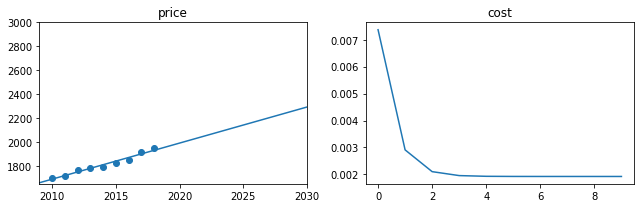

In [459]:
scaled_x = (np.array([2009, 2030]) - np.min(x_org))/(np.max(x_org)-np.min(x_org));
calculated_prices = (alpha*scaled_x+beta)*(np.max(y_org)-np.min(y_org))+np.min(y_org)
plt.figure(figsize=(9,3))

plt.subplot(1, 2, 1);
plt.title("price")
plt.scatter(year,price);
plt.plot([2009, 2030], calculated_prices);
#plt.plot([2009, 2030], initial[0]*np.array([2009, 2030])+initial[1]);
plt.xlim([2009, 2030]);
plt.ylim([1650, 3000]);

plt.subplot(1, 2, 2);
plt.title("cost")
plt.plot(cost_history);

plt.tight_layout()

print(f"Price at year 2030 is estimated to be {calculated_prices[1]}:f.2")

### Exercise 2: Linear regression + MNIST

Import [MNIST data](http://yann.lecun.com/exdb/mnist/) and convert from int to float

In [460]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Exercise 2: Tensorflow and Neural networks

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 321us/sample - loss: 0.2983 - accuracy: 0.9131
Epoch 2/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.1413 - accuracy: 0.9585
Epoch 3/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.1069 - accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0874 - accuracy: 0.9727
Epoch 5/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0744 - accuracy: 0.9769
10000/1 - 1s - loss: 0.0407 - accuracy: 0.9776


[0.07589895232543349, 0.9776]